## Molecule

The central class to construct a molecule from different chemical input formats. This class is built on top of the RDKit and OpenBabel python APIs. We join the forces and strengths of these two cheminformatic libraries for a consistent user experience. 

Several methods are available in this module to facilitate the manipulation of chemical data. 

In [1]:
from chemml.chem import Molecule

caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
caffeine_smarts = '[#6]-[#7]1:[#6]:[#7]:[#6]2:[#6]:1:[#6](=[#8]):[#7](:[#6](=[#8]):[#7]:2-[#6])-[#6]'
caffeine_inchi = 'InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3'

### Construct a molecule using SMILES

You can always see a representation of the available attributes and chemical formats. The creator shows you how this molecule was originally constructed. The rdkit and pybel molecule objects are also accessible if they have been used to create the molecule.

In [2]:
mol = Molecule(caffeine_smiles, input_type='smiles')
print(mol)
print(mol.smiles)
print(mol.creator)

<chemml.chem.Molecule(
        rdkit_molecule : <rdkit.Chem.rdchem.Mol object at 0x7ff612682ee0>,
        pybel_molecule : None,
        creator        : ('SMILES', 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'),
        smiles         : 'Cn1c(=O)c2c(ncn2C)n(C)c1=O',
        smarts         : None,
        inchi          : None,
        xyz            : None)>
Cn1c(=O)c2c(ncn2C)n(C)c1=O
('SMILES', 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C')


### Construct a molecule using 3D atomic coordinates


In [3]:
mol = Molecule('images/1_opt.xyz', 'xyz')
mol

<chemml.chem.Molecule(
        rdkit_molecule : None,
        pybel_molecule : <openbabel.pybel.Molecule object at 0x7ff61268cd60>,
        creator        : ('XYZ', 'images/1_opt.xyz'),
        smiles         : None,
        smarts         : None,
        inchi          : None,
        xyz            : <XYZ(geometry: (28, 3), atomic_numbers: (28, 1), atomic_symbols: (28, 1))>)>

### Construct a molecule using InChi

In [4]:
mol = Molecule(caffeine_inchi, 'inchi')
mol

<chemml.chem.Molecule(
        rdkit_molecule : <rdkit.Chem.rdchem.Mol object at 0x7ff61240b660>,
        pybel_molecule : None,
        creator        : ('InChi', 'InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3'),
        smiles         : None,
        smarts         : None,
        inchi          : 'InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3',
        xyz            : None)>

### Visualize the molecule

The visualize method shows or allows us to save a molecule image.

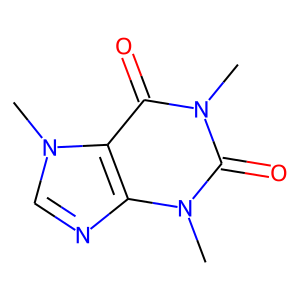

In [5]:
mol.visualize()

### Add or remove hydrogens

You may need to add hydrogens if you want to optimize the geometry of this molecule to get the spatial information.

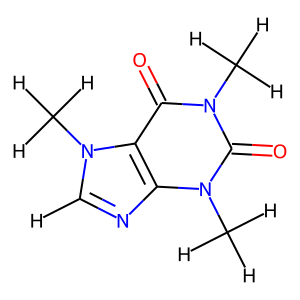

In [6]:
mol.hydrogens('add')
mol.visualize()

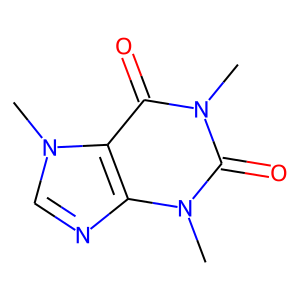

In [7]:
mol.hydrogens('remove') # just for the sake of visualization: to fit the text inside the box
mol.visualize()

### Convert chemical formats

In [8]:
mol.to_smiles(kekuleSmiles=True) # although I already had it: just to make sure I have kekulized SMILES
mol.to_smarts(isomericSmiles=False)
mol.to_inchi()
mol

<chemml.chem.Molecule(
        rdkit_molecule : <rdkit.Chem.rdchem.Mol object at 0x7ff6123e29a0>,
        pybel_molecule : None,
        creator        : ('InChi', 'InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3'),
        smiles         : 'CN1C(=O)C2=C(N=CN2C)N(C)C1=O',
        smarts         : '[#6H3]-[#7]1:[#6H]:[#7]:[#6]2:[#6]:1:[#6](:[#7](-[#6H3]):[#6](:[#7]:2-[#6H3])=[#8])=[#8]',
        inchi          : 'InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3',
        xyz            : None)>

### Optimize XYZ geometry

You can optimize a molecule’s structure using force fields via to_xyz method. If the 3D info is not available you should specify a force field as an optimizer.

In [9]:
mol.hydrogens('add')
mol.to_xyz(optimizer='MMFF', mmffVariant='MMFF94s', maxIters=300) # 'UFF'
mol

<chemml.chem.Molecule(
        rdkit_molecule : <rdkit.Chem.rdchem.Mol object at 0x7ff6123f9880>,
        pybel_molecule : None,
        creator        : ('InChi', 'InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3'),
        smiles         : 'CN1C(=O)C2=C(N=CN2C)N(C)C1=O',
        smarts         : '[#6H3]-[#7]1:[#6H]:[#7]:[#6]2:[#6]:1:[#6](:[#7](-[#6H3]):[#6](:[#7]:2-[#6H3])=[#8])=[#8]',
        inchi          : 'InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3',
        xyz            : <XYZ(geometry: (24, 3), atomic_numbers: (24, 1), atomic_symbols: (24, 1))>)>

In [10]:
mol.xyz.geometry

array([[-2.36692757, -2.28335772,  0.53992304],
       [ 0.32204937,  2.74601445, -1.37302266],
       [ 2.90718619, -0.57551206,  1.14052643],
       [-2.64477579, -0.11928699, -0.69453293],
       [-0.63353949, -0.52418726,  0.09809813],
       [-0.68417929,  0.67033406, -0.55384519],
       [ 0.54691374, -1.030122  ,  0.70648171],
       [ 1.6282777 ,  1.0716059 , -0.10505256],
       [-1.92702632,  0.92861735, -1.04796252],
       [-1.89831872, -1.03005027,  0.00546184],
       [ 0.41948147,  1.48015768, -0.66959671],
       [ 1.64071624, -0.17160277,  0.56192208],
       [ 0.58191842, -2.10836174,  1.29188919],
       [ 2.64977785,  1.76115728, -0.18017807],
       [-1.79046003, -3.09291043,  0.0854339 ],
       [-3.42660851, -2.40755161,  0.30241858],
       [-2.23159667, -2.27174952,  1.62426683],
       [ 0.0140735 ,  2.55773804, -2.40642947],
       [-0.42450498,  3.37408335, -0.87662244],
       [ 1.27541304,  3.2806427 , -1.38499594],
       [ 3.22486349,  0.1822382 ,  1.864